# Clase 8: Redes neuronales e Introducción a Deep Learning 

El **MNIST** es un conjunto de datos **desarrollado por Yann LeCun, Corinna Cortes y Christopher Burges** para la evaluación de modelos de aprendizaje de máquinas sobre el problema de la clasificación de los dígitos escritos a mano. La base de datos se construyó a partir de varios conjuntos de datos de documentos escaneados disponibles en la carpeta Instituto Nacional de Estándares y Tecnología (NIST).

Las imágenes de los dígitos fueron tomadas de una variedad de documentos escaneados, normalizados en tamaño y centrado. Esto lo convierte en un excelente conjunto de datos para evaluar modelos, permitiendo al desarrollador centrar el aprendizaje de la máquina con muy poca limpieza de datos. **Cada imagen tiene 28 x 28 píxeles cuadrados (784 píxeles en total)**. Se utiliza una división estándar del conjunto de datos para evaluar y comparar modelos, en la que **se utilizan 60.000 imágenes para formar un modelo y un conjunto separado de 10.000 imágenes para probarlo**.

Es una tarea de reconocimiento de dígitos. Como tal, **hay 10 dígitos (0 a 9) o 10 clases para predecir**. Los resultados se informan utilizando el error de predicción. Excelentes resultados consiguen un error de predicción inferior al 1%. Una predicción de aproximadamente 0.2% se puede lograr con Redes Neuronales Convolucionales grandes.

In [0]:
import warnings
warnings.filterwarnings("ignore")

## ANN - Backpropagation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from keras.datasets import mnist
import seaborn as sns

%matplotlib inline


Using TensorFlow backend.


In [0]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [5]:
X = train_images.reshape(-1,784)
y = train_labels.reshape(train_labels.shape[0],1)
X_test  = test_images.reshape(-1,784)
y_test = test_labels.reshape(test_labels.shape[0],1)

X.shape, y.shape

((60000, 784), (60000, 1))

### Visualización de datos

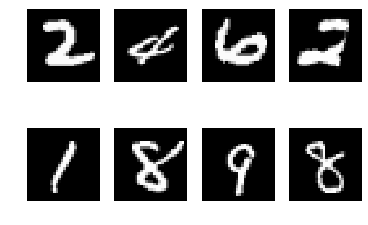

In [6]:
sample = np.random.choice(X.shape[0], 8)

# plot sample images as gray scale
for (i,s) in enumerate(sample):
  plt.subplot(241+i)
  plt.axis('off')
  plt.imshow(train_images[s], cmap=plt.get_cmap('gray'))

# show the plot

plt.show()

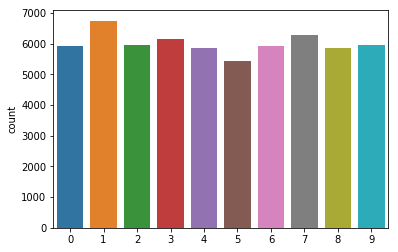

In [7]:
sns.countplot(train_labels)

### Data normalization

Normalizamos nuestros datos en el dominio de [0.01, 0.99], de manera que nos facilita las operaciones logarítimicas.

In [0]:
X = np.asfarray(X) / 255.0
X_test = np.asfarray(X_test) / 255.0

### Representación One-Hot

Podemos verificar que las salidas actuales de las etiquetas son de un solo dígito, sin embargo el número de nodos de salida de la red es de 10, por ello que las etiquetas deben ser transformadas en vectores de salida. Para ello aplicamos la transformación One-Hot-Encoder.

(60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


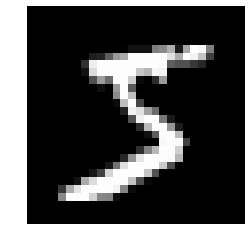

In [9]:
#Transformamos nuestros labels en vectores usando el método de one hot encoding

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
y_onehot = encoder.fit_transform(y)

print(y_onehot.shape)
print(y_onehot[0]) #one hot encoding del número 5

plt.axis('off')
plt.imshow(train_images[0], cmap=plt.get_cmap('gray'))
plt.show()

### Función sigmoide como función de activación

![Función Sigmoide](https://miro.medium.com/max/606/1*Xu7B5y9gp0iL5ooBj7LtWw.png)


In [0]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

### Forward propagation

In [0]:
#Definimos la función de forward propagation de la ANN

def forward_propagate(X, theta1, theta2):
    m = X.shape[0]
    
    #input layer
    a1 = np.insert(X, 0, values=np.ones(m), axis=1) #insertamos el bias
    
    #un hidden layer
    z2 = a1 * theta1.T
    a2 = np.insert(sigmoid(z2), 0, values=np.ones(m), axis=1)
    
    #output layer
    z3 = a2 * theta2.T
    h = sigmoid(z3)
    
    return a1, z2, a2, z3, h

### Función de costo

In [0]:
def cost(params, input_size, hidden_size, num_labels, X, y, learning_rate):
    m = X.shape[0]
    X = np.matrix(X)
    y = np.matrix(y)
    
    # reshape the parameter array into parameter matrices for each layer
    theta1 = np.matrix(np.reshape(params[:hidden_size * (input_size + 1)], (hidden_size, (input_size + 1))))
    theta2 = np.matrix(np.reshape(params[hidden_size * (input_size + 1):], (num_labels, (hidden_size + 1))))
    
    # run the feed-forward pass
    a1, z2, a2, z3, h = forward_propagate(X, theta1, theta2)
    
    # compute the cost
    J = 0
    for i in range(m):
        first_term = np.multiply(-y[i,:], np.log(h[i,:]))
        second_term = np.multiply((1 - y[i,:]), np.log(1 - h[i,:]))
        J += np.sum(first_term - second_term)
    
    J = J / m
    
    return J

### Inicialización de parámetros

In [13]:
# initial setup
input_size = 784
hidden_size = 25
num_labels = 10
learning_rate = 0.1

# randomly initialize a parameter array of the size of the full network's parameters
params = (np.random.random(size=hidden_size * (input_size + 1) + num_labels * (hidden_size + 1)) - 0.5) * 0.25

m = X.shape[0]
X = np.matrix(X)
y = np.matrix(y)

# unravel the parameter array into parameter matrices for each layer
theta1 = np.matrix(np.reshape(params[:hidden_size * (input_size + 1)], (hidden_size, (input_size + 1))))
theta2 = np.matrix(np.reshape(params[hidden_size * (input_size + 1):], (num_labels, (hidden_size + 1))))

theta1.shape, theta2.shape

((25, 785), (10, 26))

In [14]:
a1, z2, a2, z3, h = forward_propagate(X, theta1, theta2)
a1.shape, z2.shape, a2.shape, z3.shape, h.shape

((60000, 785), (60000, 25), (60000, 26), (60000, 10), (60000, 10))

In [15]:
cost(params, input_size, hidden_size, num_labels, X, y_onehot, learning_rate)

7.494712153053436

### Backpropagation

El proceso de backpropagation tiene como objeto el cálculo de las gradientes en cada nodo de la red, esta matriz de gradiente posteriormente será usada para optimizar la función de costo y así encontrar los mejores parámetros de la red. Comenzamos encontrando la gradiente de la función de activación y luego el proceso mismo de backpropagation

In [0]:
def sigmoid_gradient(z):
    return np.multiply(sigmoid(z), (1 - sigmoid(z)))

In [0]:
def backprop(params, input_size, hidden_size, num_labels, X, y, learning_rate):
    m = X.shape[0]
    X = np.matrix(X)
    y = np.matrix(y)
    
    # reshape the parameter array into parameter matrices for each layer
    theta1 = np.matrix(np.reshape(params[:hidden_size * (input_size + 1)], (hidden_size, (input_size + 1))))
    theta2 = np.matrix(np.reshape(params[hidden_size * (input_size + 1):], (num_labels, (hidden_size + 1))))
    
    # run the feed-forward pass
    a1, z2, a2, z3, h = forward_propagate(X, theta1, theta2)
    
    # initializations
    J = 0
    delta1 = np.zeros(theta1.shape)  # (25, 401)
    delta2 = np.zeros(theta2.shape)  # (10, 26)
    
    # compute the cost
    for i in range(m):
        first_term = np.multiply(-y[i,:], np.log(h[i,:]))
        second_term = np.multiply((1 - y[i,:]), np.log(1 - h[i,:]))
        J += np.sum(first_term - second_term)
    
    J = J / m
    
    # add the cost regularization term
    J += (float(learning_rate) / (2 * m)) * (np.sum(np.power(theta1[:,1:], 2)) + np.sum(np.power(theta2[:,1:], 2)))
    
    # perform backpropagation
    for t in range(m):
        a1t = a1[t,:]  # (1, 401)
        z2t = z2[t,:]  # (1, 25)
        a2t = a2[t,:]  # (1, 26)
        ht = h[t,:]  # (1, 10)
        yt = y[t,:]  # (1, 10)
        
        d3t = ht - yt  # (1, 10)
        
        z2t = np.insert(z2t, 0, values=np.ones(1))  # (1, 26)
        d2t = np.multiply((theta2.T * d3t.T).T, sigmoid_gradient(z2t))  # (1, 26)
        
        delta1 = delta1 + (d2t[:,1:]).T * a1t
        delta2 = delta2 + d3t.T * a2t
        
    delta1 = delta1 / m
    delta2 = delta2 / m
    
    # add the gradient regularization term
    delta1[:,1:] = delta1[:,1:] + (theta1[:,1:] * learning_rate) / m
    delta2[:,1:] = delta2[:,1:] + (theta2[:,1:] * learning_rate) / m
    
    # unravel the gradient matrices into a single array
    grad = np.concatenate((np.ravel(delta1), np.ravel(delta2)))
    
    return J, grad

In [18]:
# Probamos el modelo
J, grad = backprop(params, input_size, hidden_size, num_labels, X, y_onehot, learning_rate)
J, grad.shape

(7.494797978901636, (19885,))

### Minimización de la función de costo basado en el cálculo de gradientes

Con las gradientes halladas podemos utilizar una función de optimización, en clase aprendimos gradiente descendente, pero existen otras técnicas mucho más rápidas como el método de Newton, que es el que usamos en la función de minimización.

NOTA: Antes de ejecutar la instrucción, verifica que no estes realizando otras tareas en tu computador, este proceso demandará algunos minutos, dependiendo de las capacidades de máquina, en promedio 10 minutos.

In [19]:
from scipy.optimize import minimize

# minimize the objective function
fmin = minimize(fun=backprop, x0=params, args=(input_size, hidden_size, num_labels, X, y_onehot, learning_rate), 
                method='TNC', jac=True, options={'maxiter': 100})
fmin

     fun: 0.907103632358216
     jac: array([-5.69509464e-04, -1.42002263e-07,  9.63455402e-08, ...,
        1.14414953e-02,  1.75226719e-04,  6.29372886e-03])
 message: 'Max. number of function evaluations reached'
    nfev: 100
     nit: 10
  status: 3
 success: False
       x: array([ 0.16784545, -0.08520136,  0.05780732, ..., -0.68569967,
       -0.41873154, -0.83548194])

### Prueba del modelo

Con los pesos de los parámetros calculados, podemos realizar nuestra predicciones con el conjunto de prueba y verificar la tasa de acierto del modelo entrenado.

In [20]:
X_test = np.matrix(X_test)
theta1 = np.matrix(np.reshape(fmin.x[:hidden_size * (input_size + 1)], (hidden_size, (input_size + 1))))
theta2 = np.matrix(np.reshape(fmin.x[hidden_size * (input_size + 1):], (num_labels, (hidden_size + 1))))

a1, z2, a2, z3, h = forward_propagate(X_test, theta1, theta2)
y_pred = np.array(np.argmax(h, axis=1))
y_pred

array([[7],
       [2],
       [1],
       ...,
       [4],
       [8],
       [6]])

In [21]:
correct = [1 if a == b else 0 for (a, b) in zip(y_pred, y_test)]
accuracy = (sum(map(int, correct)) / float(len(correct)))
print ('accuracy = {0}%'.format(accuracy * 100))

accuracy = 86.42%


## ANN - Keras implementation

**Keras** es una biblioteca de Redes Neuronales de Código Abierto escrita en Python. Es capaz de ejecutarse sobre TensorFlow entre otros frameworks. 

Está especialmente diseñada para posibilitar la experimentación en más o menos poco tiempo con redes de **Aprendizaje Profundo**. Sus fuertes se centran en ser **amigable para el usuario, modular y extensible**.

In [0]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import itertools

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the images.
train_images = (train_images / 255.0) 
test_images = (test_images / 255.0) 

# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

# Build the model.
model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])

# Compile the model.
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)


In [31]:
num_classes = 10
train_labels = keras.utils.to_categorical(train_labels, num_classes)
Train_images, Val_images, Train_labels, Val_labels = train_test_split(train_images, train_labels, test_size = 0.1, random_state=42)

# Train the model.
h = model.fit(
  Train_images,
  Train_labels,
  validation_data=(Val_images, Val_labels),
  epochs=5,
  batch_size=32,
)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 7s 121us/step - loss: 0.2906 - acc: 0.9145 - val_loss: 0.1521 - val_acc: 0.9547
Epoch 2/5
54000/54000 [==============================] - 6s 115us/step - loss: 0.1288 - acc: 0.9613 - val_loss: 0.1093 - val_acc: 0.9665
Epoch 3/5
54000/54000 [==============================] - 6s 113us/step - loss: 0.0935 - acc: 0.9725 - val_loss: 0.1131 - val_acc: 0.9672
Epoch 4/5
54000/54000 [==============================] - 6s 117us/step - loss: 0.0760 - acc: 0.9765 - val_loss: 0.0945 - val_acc: 0.9693
Epoch 5/5
54000/54000 [==============================] - 6s 115us/step - loss: 0.0587 - acc: 0.9814 - val_loss: 0.0905 - val_acc: 0.9735


### Evaluación del modelo

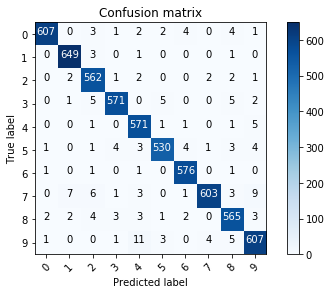

In [32]:
# Look at confusion matrix 
#Note, this code is taken straight from the SKLEARN website, an nice way of viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(Val_images)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Val_labels, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


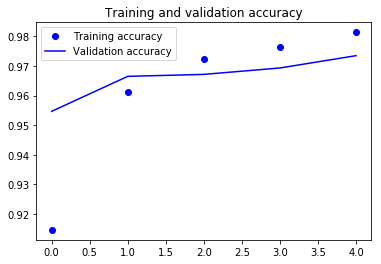

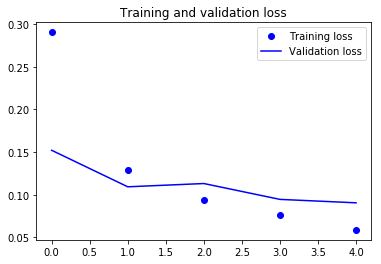

In [33]:
print(h.history.keys())
accuracy = h.history['acc']
val_accuracy = h.history['val_acc']
loss = h.history['loss']
val_loss = h.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


### Ejemplos de predicción

In [34]:
# Predict on the first 5 test images.
predictions = model.predict(test_images[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(test_labels[:5]) # [7, 2, 1, 0, 4]


[7 2 1 0 4]
[7 2 1 0 4]


### Reporte de clasificación

In [0]:
#get the predictions for the test data
predicted_classes = model.predict_classes(test_images)

#get the indices to be plotted
y_true = test_labels
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

In [36]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.98      0.99      0.99       980
     Class 1       0.99      0.98      0.99      1135
     Class 2       0.97      0.98      0.97      1032
     Class 3       0.96      0.98      0.97      1010
     Class 4       0.95      0.99      0.97       982
     Class 5       0.98      0.97      0.97       892
     Class 6       0.97      0.98      0.98       958
     Class 7       0.99      0.94      0.96      1028
     Class 8       0.97      0.97      0.97       974
     Class 9       0.97      0.97      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



## Aplicación de CNN (Convolutional Neural Network)

In [0]:
# Plot ad hoc mnist instances
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #for plotting
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import seaborn as sns
from subprocess import check_output
from keras.datasets import mnist

# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

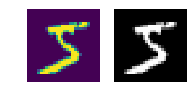

In [38]:
# plot 4 images as gray scale

plt.subplot(241)
plt.axis('off')
plt.imshow(X_train[0])

plt.subplot(242)
plt.axis('off')
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))

# show the plot
plt.show()

### Normalization

In [0]:
X_norm_train = X_train/255.0
X_norm_test = X_test/255.0

### Reshape

In [0]:
X_rshp_train = X_norm_train.reshape(X_norm_train.shape[0], 28, 28,1)
X_rshp_test = X_norm_test.reshape(X_norm_test.shape[0], 28, 28,1)


### Model

In [0]:
X_train = X_rshp_train
X_test = X_rshp_test

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
batch_size = 200
num_classes = 10
epochs = 5
input_shape = (28, 28, 1)

In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state=42)

In [44]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal',input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.20))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.0001)

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=15, # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [45]:
datagen.fit(X_train)
h = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction],)

Epoch 1/5
270/270 [==============================] - 14s 52ms/step - loss: 0.3577 - acc: 0.8859 - val_loss: 0.0481 - val_acc: 0.9845
Epoch 2/5
270/270 [==============================] - 12s 44ms/step - loss: 0.1042 - acc: 0.9685 - val_loss: 0.0498 - val_acc: 0.9857
Epoch 3/5
270/270 [==============================] - 12s 43ms/step - loss: 0.0764 - acc: 0.9760 - val_loss: 0.0298 - val_acc: 0.9915
Epoch 4/5
270/270 [==============================] - 12s 43ms/step - loss: 0.0643 - acc: 0.9801 - val_loss: 0.0319 - val_acc: 0.9903
Epoch 5/5
270/270 [==============================] - 12s 44ms/step - loss: 0.0548 - acc: 0.9827 - val_loss: 0.0234 - val_acc: 0.9915


In [46]:
final_loss, final_acc = model.evaluate(X_val, Y_val, verbose=0)
print("Final loss: {0:.6f}, final accuracy: {1:.6f}".format(final_loss, final_acc))

Final loss: 0.023375, final accuracy: 0.991500


### Evaluación del modelo

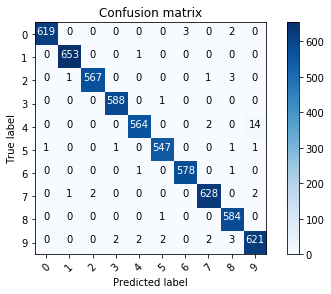

In [47]:
# Look at confusion matrix 
#Note, this code is taken straight from the SKLEARN website, an nice way of viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))



dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'lr'])


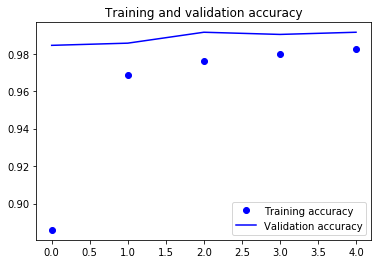

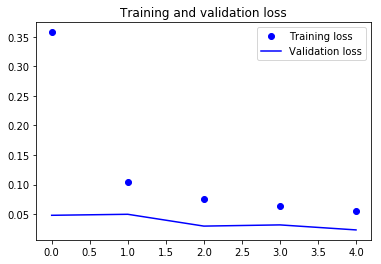

In [48]:
print(h.history.keys())
accuracy = h.history['acc']
val_accuracy = h.history['val_acc']
loss = h.history['loss']
val_loss = h.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()



### Ejemplos donde el modelo falló

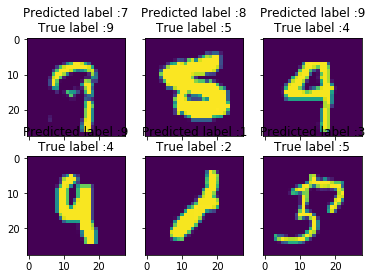

In [52]:
# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_val[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

### Visualización de aprendizaje de características en cada capa

In [53]:
layer_names = []
for layer in model.layers[:-1]:
    layer_names.append(layer.name) 

layer_names

['conv2d_1',
 'conv2d_2',
 'max_pooling2d_1',
 'dropout_1',
 'conv2d_3',
 'conv2d_4',
 'max_pooling2d_2',
 'dropout_2',
 'conv2d_5',
 'dropout_3',
 'flatten_1',
 'dense_13',
 'batch_normalization_1',
 'dropout_4']

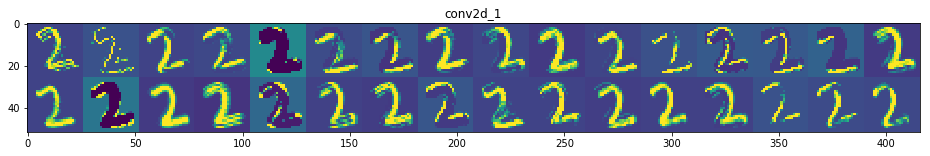

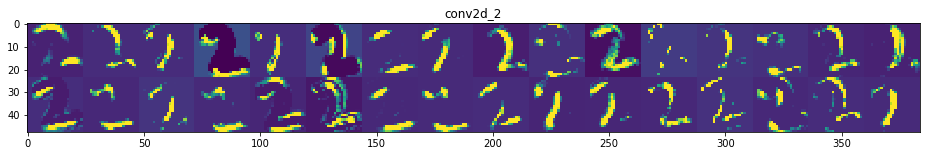

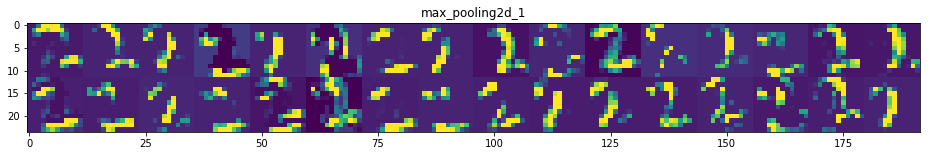

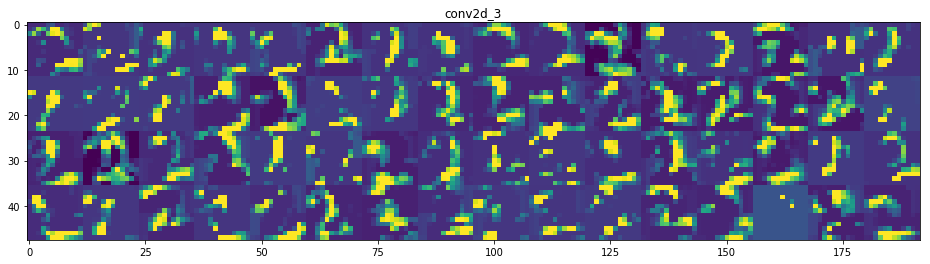

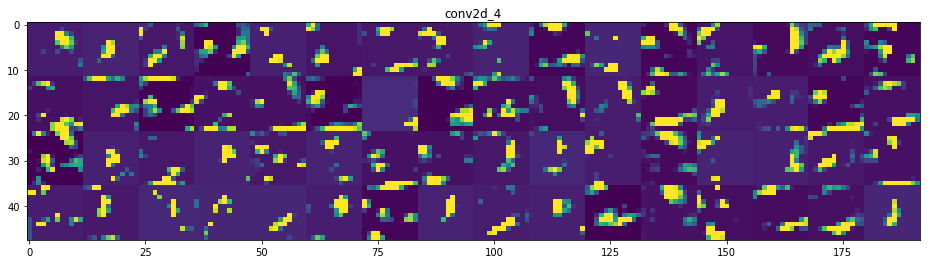

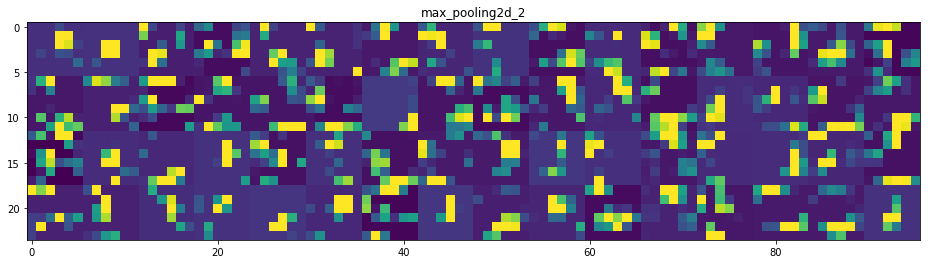

In [57]:
from keras import models
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(input=model.input, output=layer_outputs)

test_im = X_train[154]

activations = activation_model.predict(test_im.reshape(1,28,28,1))

images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    if layer_name.startswith('conv'):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,:, :, col * images_per_row + row]
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')
    else:
        if layer_name.startswith('max'):
            n_features = layer_activation.shape[-1]
            size = layer_activation.shape[1]
            n_cols = n_features // images_per_row
            display_grid = np.zeros((size * n_cols, images_per_row * size))
            for col in range(n_cols):
                for row in range(images_per_row):
                    channel_image = layer_activation[0,:, :, col * images_per_row + row]
                    channel_image -= channel_image.mean()
                    channel_image /= channel_image.std()
                    channel_image *= 64
                    channel_image += 128
                    channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                    display_grid[col * size : (col + 1) * size,
                                 row * size : (row + 1) * size] = channel_image
            scale = 1. / size
            plt.figure(figsize=(scale * display_grid.shape[1],
                                scale * display_grid.shape[0]))
            plt.title(layer_name)
            plt.grid(False)
            plt.imshow(display_grid, aspect='auto', cmap='viridis')


### Report de clasificación 

In [0]:
#get the predictions for the test data
predicted_classes = model.predict_classes(X_test)

#get the indices to be plotted
y_true = y_test
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

In [59]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00       980
     Class 1       1.00      1.00      1.00      1135
     Class 2       0.99      1.00      0.99      1032
     Class 3       0.99      1.00      0.99      1010
     Class 4       1.00      0.99      0.99       982
     Class 5       1.00      0.99      0.99       892
     Class 6       1.00      0.99      1.00       958
     Class 7       1.00      0.99      0.99      1028
     Class 8       0.99      1.00      0.99       974
     Class 9       0.99      1.00      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

